In [1]:
from mmengine import Config
from mmengine.dataset import Compose
from mmseg.utils import register_all_modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

register_all_modules()

%matplotlib inline

In [2]:
cfg = Config.fromfile(filename='/workspaces/mowing-terrain-seg/work_dirs_old/mask2former_r50_8xb2-90k_ycor-1024x544/baseline1/mask2former_r50_8xb2-90k_ycor-1024x544.py')

In [3]:
img_np = cv2.imread('/workspaces/mowing-terrain-seg/assets/image/iid000841_rgb.jpg')

In [4]:
img_np.shape

(544, 1024, 3)

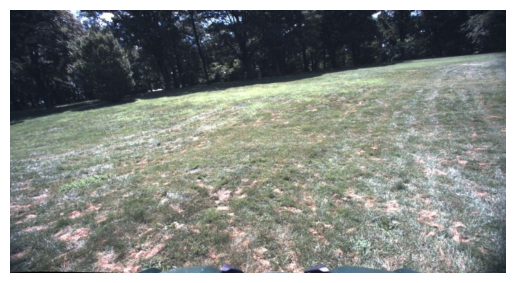

In [5]:
img_rgb = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")                                   # optional: hide axes
plt.show()

In [6]:
type(cfg.test_pipeline)

list

In [7]:
cfg['data_preprocessor']

{'bgr_to_rgb': True,
 'mean': [123.675, 116.28, 103.53],
 'pad_val': 0,
 'seg_pad_val': 255,
 'size': (1024, 544),
 'std': [58.395, 57.12, 57.375],
 'test_cfg': {'size_divisor': 32},
 'type': 'SegDataPreProcessor'}

In [8]:
cfg.test_pipeline

[{'type': 'LoadImageFromFile'},
 {'keep_ratio': True, 'scale': (1024, 544), 'type': 'Resize'},
 {'type': 'LoadAnnotations'},
 {'type': 'PackSegInputs'}]

In [9]:
for t in cfg.test_pipeline:
    if t.get('type') == 'LoadAnnotations':
        cfg.test_pipeline.remove(t)
cfg.test_pipeline[0]['type'] = 'LoadImageFromNDArray'
pipeline = Compose(cfg.test_pipeline)

In [ ]:
img_dict = dict(img=img_np)
prep_img = pipeline(img_dict)

In [16]:
prep_img.keys()

dict_keys(['inputs', 'data_samples'])

In [20]:
prep_img_list = {
    'inputs': [],
    'data_samples': []
}

prep_img_list['inputs'].append(prep_img['inputs'])
prep_img_list['data_samples'].append(prep_img['data_samples'])

In [11]:
# img_rgb = cv2.cvtColor(np.transpose(prep_img['inputs'].numpy(), (1, 2, 0)), cv2.COLOR_BGR2RGB)

# plt.imshow(img_rgb)
# plt.axis("off")                                   # optional: hide axes
# plt.show()

In [22]:
from mmengine.registry import MODELS

In [ ]:
cfg['data_preprocessor']

{'bgr_to_rgb': True,
 'mean': [123.675, 116.28, 103.53],
 'pad_val': 0,
 'seg_pad_val': 255,
 'size': (1024, 544),
 'std': [58.395, 57.12, 57.375],
 'test_cfg': {'size_divisor': 32},
 'type': 'SegDataPreProcessor'}

In [26]:
for k in ['pad_val', 'seg_pad_val', 'test_cfg']:
    cfg['data_preprocessor'].pop(k)

In [27]:
data_preprocessor = MODELS.build(cfg['data_preprocessor'])

In [28]:
data_preprocessor(prep_img_list, False)

{'inputs': tensor([[[[-1.8097, -1.7925, -1.7925,  ..., -1.8268, -1.8610, -1.8782],
           [-1.8097, -1.7925, -1.7925,  ..., -1.8268, -1.8610, -1.8782],
           [-1.8097, -1.7925, -1.7925,  ..., -1.8268, -1.8610, -1.8610],
           ...,
           [-1.1247, -1.1589, -1.2274,  ..., -1.5357, -1.5528, -1.5185],
           [-1.3302, -1.3473, -1.3987,  ..., -1.5528, -1.5699, -1.5357],
           [-2.0837, -2.1008, -2.1179,  ..., -1.5528, -1.5870, -1.5528]],
 
          [[-1.6506, -1.6331, -1.6331,  ..., -1.6155, -1.6506, -1.6681],
           [-1.6506, -1.6331, -1.6331,  ..., -1.6155, -1.6506, -1.6681],
           [-1.6506, -1.6331, -1.6331,  ..., -1.6155, -1.6506, -1.6506],
           ...,
           [-0.9328, -0.9678, -1.0378,  ..., -1.3004, -1.3179, -1.2829],
           [-1.1254, -1.1429, -1.1954,  ..., -1.3179, -1.3354, -1.3004],
           [-1.8957, -1.9132, -1.9307,  ..., -1.3179, -1.3529, -1.3179]],
 
          [[-1.2641, -1.2467, -1.2467,  ..., -1.2467, -1.2816, -1.2990],
   